<a href="https://colab.research.google.com/github/BradenAnderson/Twitter-Sentiment-Analysis/blob/main/03_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:
# Read in the tweet data.
filename = "/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Twitter_Sentiment_Project/intermediate_output_files/vader_no_data_cleaning.csv"

tweet_df = pd.read_csv(filename)

tweet_df.head()

label  ... Compound_Sentiment_Score
0      0  ...                  -0.8296
1      0  ...                   0.6705
2      0  ...                   0.0000
3      0  ...                   0.7249
4      0  ...                   0.0000

[5 rows x 7 columns]

In [ ]:
# This function is used to create a list of all words occuring in a dataframe column.
# These words can then easily be joined together and passed to the word cloud object.
def make_master_word_list(df, include_pronouns=True):
  
  df_index_list = list(df.index)

  num_tweets = list(range(df_index_list[0], df_index_list[-1] + 1))

  master_word_list = []

  for row_number in num_tweets: 

    tweet_words = df.loc[df.index == row_number, 'Clean_Tweet'].to_numpy()[0]
    word_list = tweet_words.split(' ')

    for word in word_list:
      
      master_word_list.append(word)

  if include_pronouns == False: 
    master_word_list = [word for word in master_word_list if word != 'pron']

  return master_word_list


In [ ]:
# This function is used to create a dictionary of words and the frequency at which they appear in the tweet dataset. 
# Frequency dictionaries will be useful when creating bar graphs of the most frequently occuring words.
def make_frequency_dict(word_list, hashtag_only=False, include_pronouns=False):

  word_frequencies = {}
  
  if hashtag_only:

    for word in word_list:
      if word in word_frequencies.keys() and word.startswith('#'): 
        word_frequencies[word] = word_frequencies[word] + 1
      elif word.startswith('#'):
        word_frequencies[word] = 1
  else:
    for word in word_list:
      if word in word_frequencies.keys(): 
        word_frequencies[word] = word_frequencies[word] + 1
      else:
        word_frequencies[word] = 1

  if include_pronouns == False:
    if 'pron' in word_frequencies.keys():
      del word_frequencies['pron']
  
  return word_frequencies

In [ ]:
# Create a list of all words that appear in the tweets.
all_words = make_master_word_list(tweet_df)

# Create a set of all unique words that appear in tweets. 
unique_words = set(all_words)

# Create one long string that is all unique words, each separated by a space.
unique_word_string = " ".join(unique_words)

# Save the unique word string in a dictionary, so we can easily output to a csv. Later, when the csv is read back into a pandas dataframe,
# this string can easily be tokenized into a list of unique words by splitting at the spaces. Note: We cannot simply save the list in 
# the pandas dataframe for later use because once it is converted to a csv file, everything will become a string.
unique_word_dict = {'Unique_Words' : unique_word_string}

# Save the set of unqiue words. These may come in handy later if we want to map words to
# their fastText vector represntation in a sklearn pipeline. 
unique_df = pd.DataFrame(data=unique_word_dict, columns=['Unique_Words'], index=[0])
unique_df.to_csv(path_or_buf='/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Twitter_Sentiment_Project/intermediate_output_files/unique_words.csv', index=False)

In [ ]:
#--------------------------------------------------------------------------------------------
# Create a list containing all the words that appear in hate speech tweets
#--------------------------------------------------------------------------------------------
hate_speech_tweets_df = tweet_df.loc[tweet_df['label'] == 1, :]
hate_speech_tweets_df = hate_speech_tweets_df.reset_index()
hate_speech_word_list = make_master_word_list(df=hate_speech_tweets_df)

In [ ]:
#--------------------------------------------------------------------------------------------
# Create a list containing all the words that appear in non hate speech tweets
#--------------------------------------------------------------------------------------------
regular_tweets_df = tweet_df.loc[tweet_df['label'] == 0, :]
regular_tweets_df = regular_tweets_df.reset_index()
regular_speech_word_list = make_master_word_list(df=regular_tweets_df)

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a two strings containing all hate speech and non hate speech tweet words respectively.
# Also remove some extra ' marks that seem to have been missed in the spacy data cleaning.
#------------------------------------------------------------------------------------------------------------------------------------------
hate_speech_string = " ".join(hate_speech_word_list)
regular_speech_string = " ".join(regular_speech_word_list)

In [ ]:
# Create word cloud objects for the hate speech and non hate speech words.
hate_wordcloud = WordCloud().generate(hate_speech_string)
regular_word_cloud = WordCloud().generate(regular_speech_string)

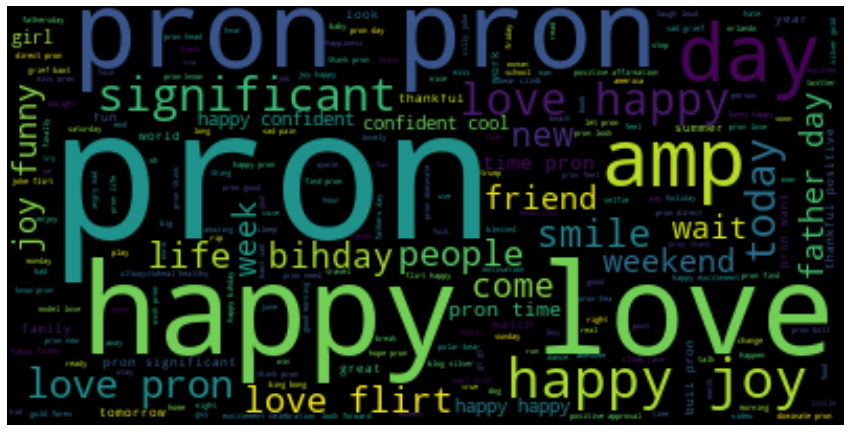

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a word cloud of words appearing in non hate speech tweets.
#
# Note: Spacys lemmatizer replaces all pronouns with the word 'pron'. This may be useful if we want to keep pronouns for modeling,
# however they are not very interesting for a word cloud. These will be removed and word cloud regenerated.
#------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(regular_word_cloud, interpolation='bilinear');
plt.axis("off");

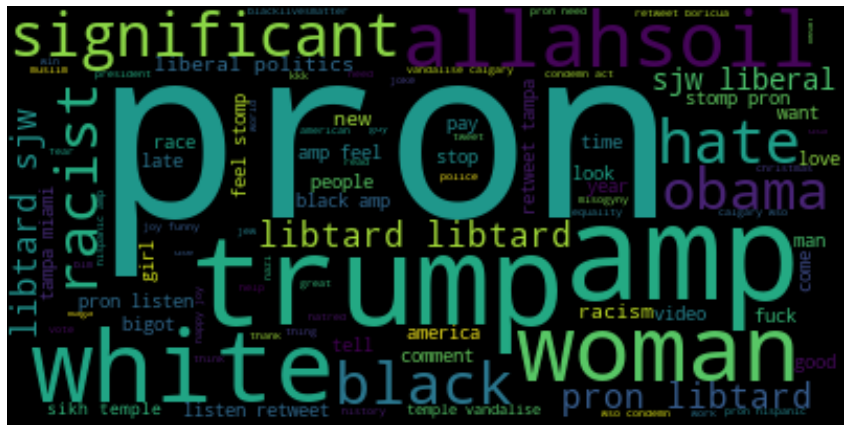

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a word cloud of words appearing in hate speech tweets.
#
# Note: Spacys lemmatizer replaces all pronouns with the word 'pron'. This may be useful if we want to keep pronouns for modeling,
# however they are not very interesting for a word cloud. These will be removed and word cloud regenerated.
#------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(hate_wordcloud, interpolation='bilinear');
plt.axis("off");

In [ ]:
# Filtering out 'pron'
hate_speech_string = hate_speech_string.replace('pron', "")
regular_speech_string = regular_speech_string.replace('pron', "")

# Recreating the word clouds.
hate_wordcloud = WordCloud().generate(hate_speech_string)
regular_word_cloud = WordCloud().generate(regular_speech_string)

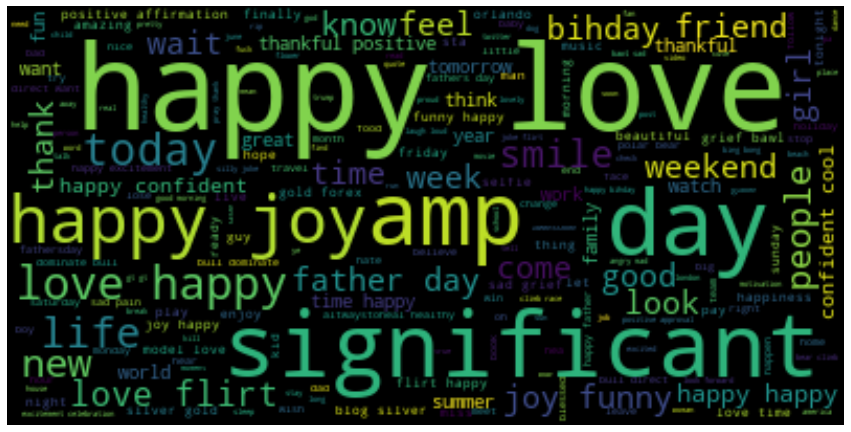

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a word cloud of words appearing in non hate speech tweets.
#
# Note: All instances of the word "pron" (pronoun) now removed.
#------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(regular_word_cloud, interpolation='bilinear');
plt.axis("off");

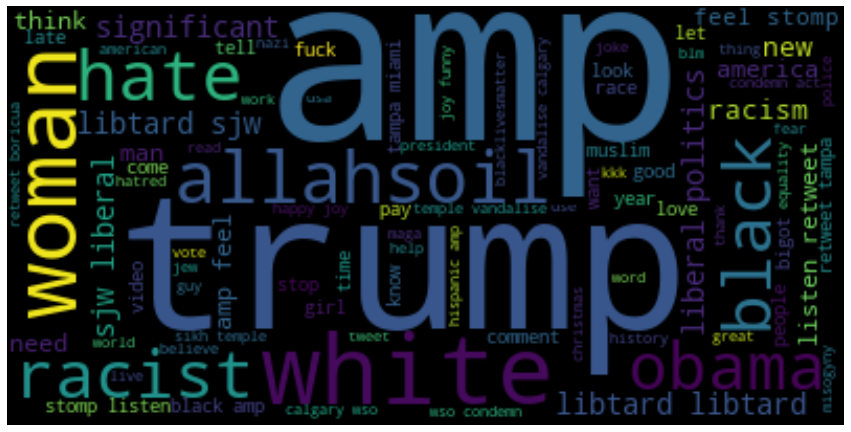

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a word cloud of words appearing in hate speech tweets.
#
# Note: All instances of the word "pron" (pronoun) now removed.
#------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(hate_wordcloud, interpolation='bilinear');
plt.axis("off");

In [ ]:
all_tweet_word_frequencies = make_frequency_dict(all_words)
hate_speech_tweet_words_frequencies = make_frequency_dict(hate_speech_word_list)
regular_tweet_word_frequencies = make_frequency_dict(regular_speech_word_list)

all_tweet_freq_df = pd.DataFrame({'Word' : all_tweet_word_frequencies.keys(),
                                  'Frequency' : all_tweet_word_frequencies.values()})

hate_speech_freq_df = pd.DataFrame({'Word' : hate_speech_tweet_words_frequencies.keys(),
                                    'Frequency' : hate_speech_tweet_words_frequencies.values()})

regular_speech_freq_df = pd.DataFrame({'Word' : regular_tweet_word_frequencies.keys(),
                                       'Frequency' : regular_tweet_word_frequencies.values()})

most_frequent_df = all_tweet_freq_df.nlargest(15, columns='Frequency', keep='all')

most_frequent_hate_df = hate_speech_freq_df.nlargest(15, columns='Frequency', keep='all')

most_frequent_regular_df = regular_speech_freq_df.nlargest(15, columns='Frequency', keep='all')

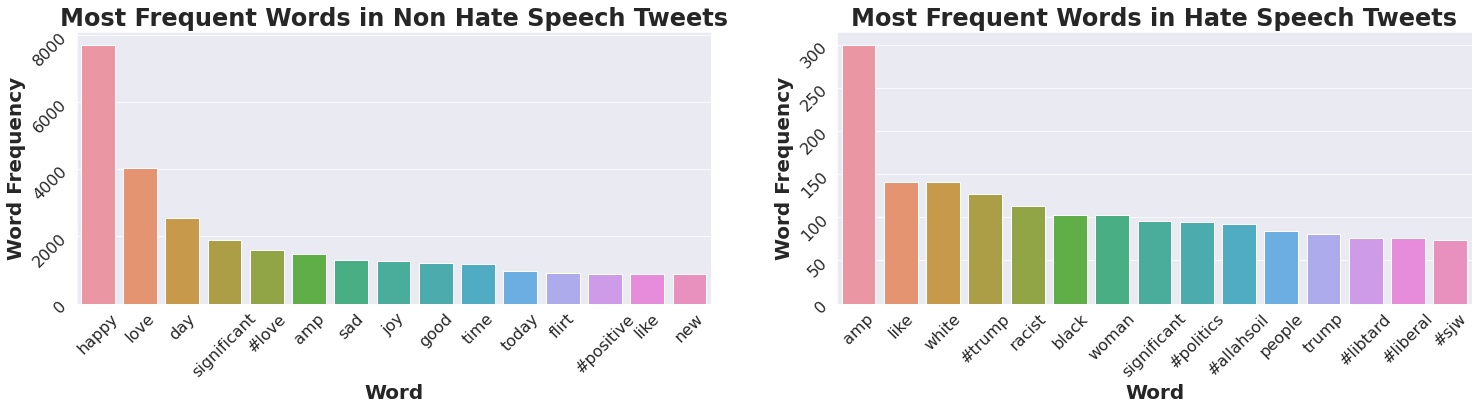

In [ ]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (25, 5), squeeze=False, gridspec_kw = {'wspace':0.2, 'hspace':0.3})

sns.barplot(x='Word', y='Frequency', data=most_frequent_regular_df, ax=axs[0][0])

axs[0][0].set_title("Most Frequent Words in Non Hate Speech Tweets", fontsize=24, weight='bold')
axs[0][0].set_xlabel("Word", fontsize=20, weight='bold')
axs[0][0].set_ylabel("Word Frequency", fontsize=20, weight='bold')
axs[0][0].tick_params(axis='both', labelsize=16, labelrotation=45)

sns.barplot(x='Word', y='Frequency', data=most_frequent_hate_df, ax=axs[0][1])

axs[0][1].set_title("Most Frequent Words in Hate Speech Tweets", fontsize=24, weight='bold')
axs[0][1].set_xlabel("Word", fontsize=20, weight='bold')
axs[0][1].set_ylabel("Word Frequency", fontsize=20, weight='bold')
axs[0][1].tick_params(axis='both', labelsize=16, labelrotation=45)

In [ ]:
all_tweet_word_frequencies_hashOnly = make_frequency_dict(all_words, hashtag_only=True)
hate_speech_tweet_words_frequencies_hashOnly = make_frequency_dict(hate_speech_word_list, hashtag_only=True)
regular_tweet_word_frequencies_hashOnly = make_frequency_dict(regular_speech_word_list, hashtag_only=True)

all_tweet_freq_df = pd.DataFrame({'Word' : all_tweet_word_frequencies_hashOnly.keys(),
                                  'Frequency' : all_tweet_word_frequencies_hashOnly.values()})

hate_speech_freq_df = pd.DataFrame({'Word' : hate_speech_tweet_words_frequencies_hashOnly.keys(),
                                    'Frequency' : hate_speech_tweet_words_frequencies_hashOnly.values()})

regular_speech_freq_df = pd.DataFrame({'Word' : regular_tweet_word_frequencies_hashOnly.keys(),
                                       'Frequency' : regular_tweet_word_frequencies_hashOnly.values()})

most_frequent_df = all_tweet_freq_df.nlargest(15, columns='Frequency', keep='all')

most_frequent_hate_df = hate_speech_freq_df.nlargest(15, columns='Frequency', keep='all')

most_frequent_regular_df = regular_speech_freq_df.nlargest(15, columns='Frequency', keep='all')

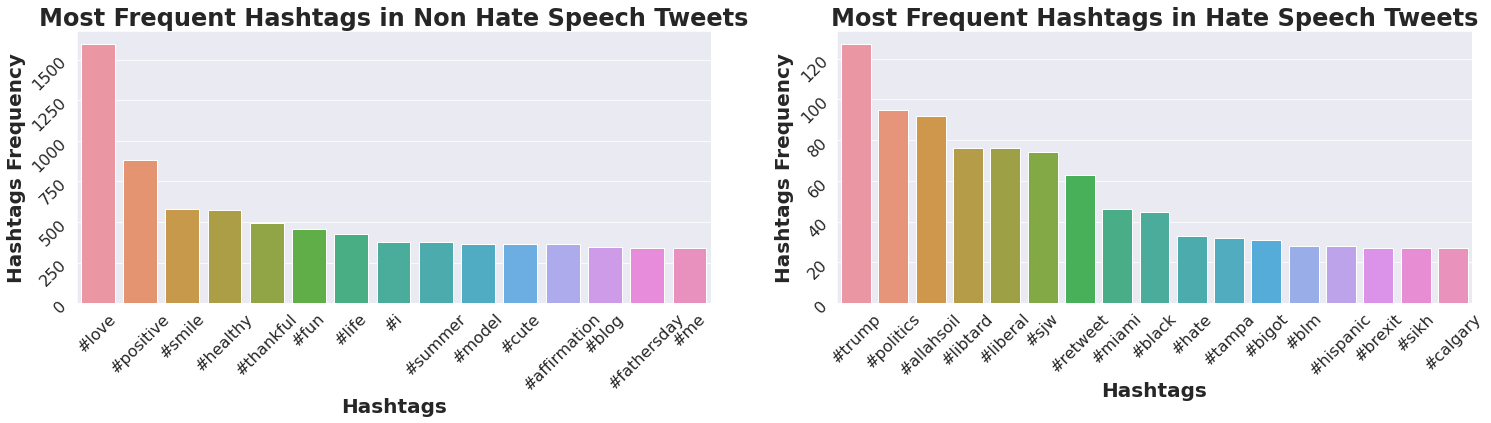

In [ ]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (25, 5), squeeze=False, gridspec_kw = {'wspace':0.2, 'hspace':0.3})

sns.barplot(x='Word', y='Frequency', data=most_frequent_regular_df, ax=axs[0][0])

axs[0][0].set_title("Most Frequent Hashtags in Non Hate Speech Tweets", fontsize=24, weight='bold')
axs[0][0].set_xlabel("Hashtags", fontsize=20, weight='bold')
axs[0][0].set_ylabel("Hashtags Frequency", fontsize=20, weight='bold')
axs[0][0].tick_params(axis='both', labelsize=16, labelrotation=45)

sns.barplot(x='Word', y='Frequency', data=most_frequent_hate_df, ax=axs[0][1])

axs[0][1].set_title("Most Frequent Hashtags in Hate Speech Tweets", fontsize=24, weight='bold')
axs[0][1].set_xlabel("Hashtags", fontsize=20, weight='bold')
axs[0][1].set_ylabel("Hashtags Frequency", fontsize=20, weight='bold')
axs[0][1].tick_params(axis='both', labelsize=16, labelrotation=45)

# Vader perspective

In [ ]:
tweet_df.head()

label  ... Compound_Sentiment_Score
0      0  ...                  -0.8296
1      0  ...                   0.6705
2      0  ...                   0.0000
3      0  ...                   0.7249
4      0  ...                   0.0000

[5 rows x 7 columns]

In [ ]:
# Create filters for label (hate speech vs not) and sentiment (how vaders compound score classified the tweet).
hate_speech = (tweet_df['label'] == 1)
regular_speech = (tweet_df['label'] == 0)

negative_sentiment = (tweet_df['Compound_Sentiment_Score'] < 0)
positive_sentiment = (tweet_df['Compound_Sentiment_Score'] > 0)
neutral_sentiment = (tweet_df['Compound_Sentiment_Score'] == 0)

# Create dataframes for every combination of, label = (hate speech, no hate speech) and sentiment = (positive, negative, neutral).
hate_speech_positive_sent_df = tweet_df.loc[(hate_speech) & (positive_sentiment), :].reset_index(drop=True)
hate_speech_negative_sent_df = tweet_df.loc[(hate_speech) & (negative_sentiment), :].reset_index(drop=True)
hate_speech_neutral_sent_df = tweet_df.loc[(hate_speech) & (neutral_sentiment), :].reset_index(drop=True)

regular_speech_positive_sent_df = tweet_df.loc[(regular_speech) & (positive_sentiment), :].reset_index(drop=True)
regular_speech_negative_sent_df = tweet_df.loc[(regular_speech) & (negative_sentiment), :].reset_index(drop=True)
regular_speech_neutral_sent_df = tweet_df.loc[(regular_speech) & (neutral_sentiment), :].reset_index(drop=True)

# For each of these 6 categories, create a list of every word in every tweet.
hate_speech_positive_sent_list = make_master_word_list(hate_speech_positive_sent_df, include_pronouns=False)
hate_speech_negative_sent_list = make_master_word_list(hate_speech_negative_sent_df, include_pronouns=False)
hate_speech_neutral_sent_list = make_master_word_list(hate_speech_neutral_sent_df, include_pronouns=False)

regular_speech_positive_sent_list = make_master_word_list(regular_speech_positive_sent_df, include_pronouns=False)
regular_speech_negative_sent_list = make_master_word_list(regular_speech_negative_sent_df, include_pronouns=False)
regular_speech_neutral_sent_list = make_master_word_list(regular_speech_neutral_sent_df, include_pronouns=False)

# For each of these 6 categories, create a frequency dictionary showing every word and its associated frequency.
hate_speech_positive_sent_freq = make_frequency_dict(hate_speech_positive_sent_list)
hate_speech_negative_sent_freq = make_frequency_dict(hate_speech_negative_sent_list)
hate_speech_neutral_sent_freq = make_frequency_dict(hate_speech_neutral_sent_list)

regular_speech_positive_sent_freq = make_frequency_dict(regular_speech_positive_sent_list)
regular_speech_negative_sent_freq = make_frequency_dict(regular_speech_negative_sent_list)
regular_speech_neutral_sent_freq = make_frequency_dict(regular_speech_neutral_sent_list)

# Turn all 6 frequency dictionaries into pandas dataframes so we can easily filter by frequency.
hate_speech_positive_sent_freq_df = pd.DataFrame({'Word' : hate_speech_positive_sent_freq.keys(),
                                                  'Frequency' : hate_speech_positive_sent_freq.values()})

hate_speech_negative_sent_freq = pd.DataFrame({'Word' : hate_speech_negative_sent_freq.keys(),
                                               'Frequency' : hate_speech_negative_sent_freq.values()})

hate_speech_neutral_sent_freq_df = pd.DataFrame({'Word' : hate_speech_neutral_sent_freq.keys(),
                                                 'Frequency' : hate_speech_neutral_sent_freq.values()})

regular_speech_positive_sent_freq_df = pd.DataFrame({'Word' : regular_speech_positive_sent_freq.keys(),
                                                  'Frequency' : regular_speech_positive_sent_freq.values()})

regular_speech_negative_sent_freq = pd.DataFrame({'Word' : regular_speech_negative_sent_freq.keys(),
                                               'Frequency' : regular_speech_negative_sent_freq.values()})

regular_speech_neutral_sent_freq_df = pd.DataFrame({'Word' : regular_speech_neutral_sent_freq.keys(),
                                                 'Frequency' : regular_speech_neutral_sent_freq.values()})

# For each of the six dataframes, filter the top 15 most frequent words.
most_frequent_hate_positive_df = hate_speech_positive_sent_freq_df.nlargest(15, columns='Frequency', keep='all')

most_frequent_hate_negative_df = hate_speech_negative_sent_freq.nlargest(15, columns='Frequency', keep='all')

most_frequent_hate_neutral_df = hate_speech_neutral_sent_freq_df.nlargest(15, columns='Frequency', keep='all')

most_frequent_regular_positive_df = regular_speech_positive_sent_freq_df.nlargest(15, columns='Frequency', keep='all')

most_frequent_regular_negative_df = regular_speech_negative_sent_freq.nlargest(15, columns='Frequency', keep='all')

most_frequent_regular_neutral_df = regular_speech_neutral_sent_freq_df.nlargest(15, columns='Frequency', keep='all')

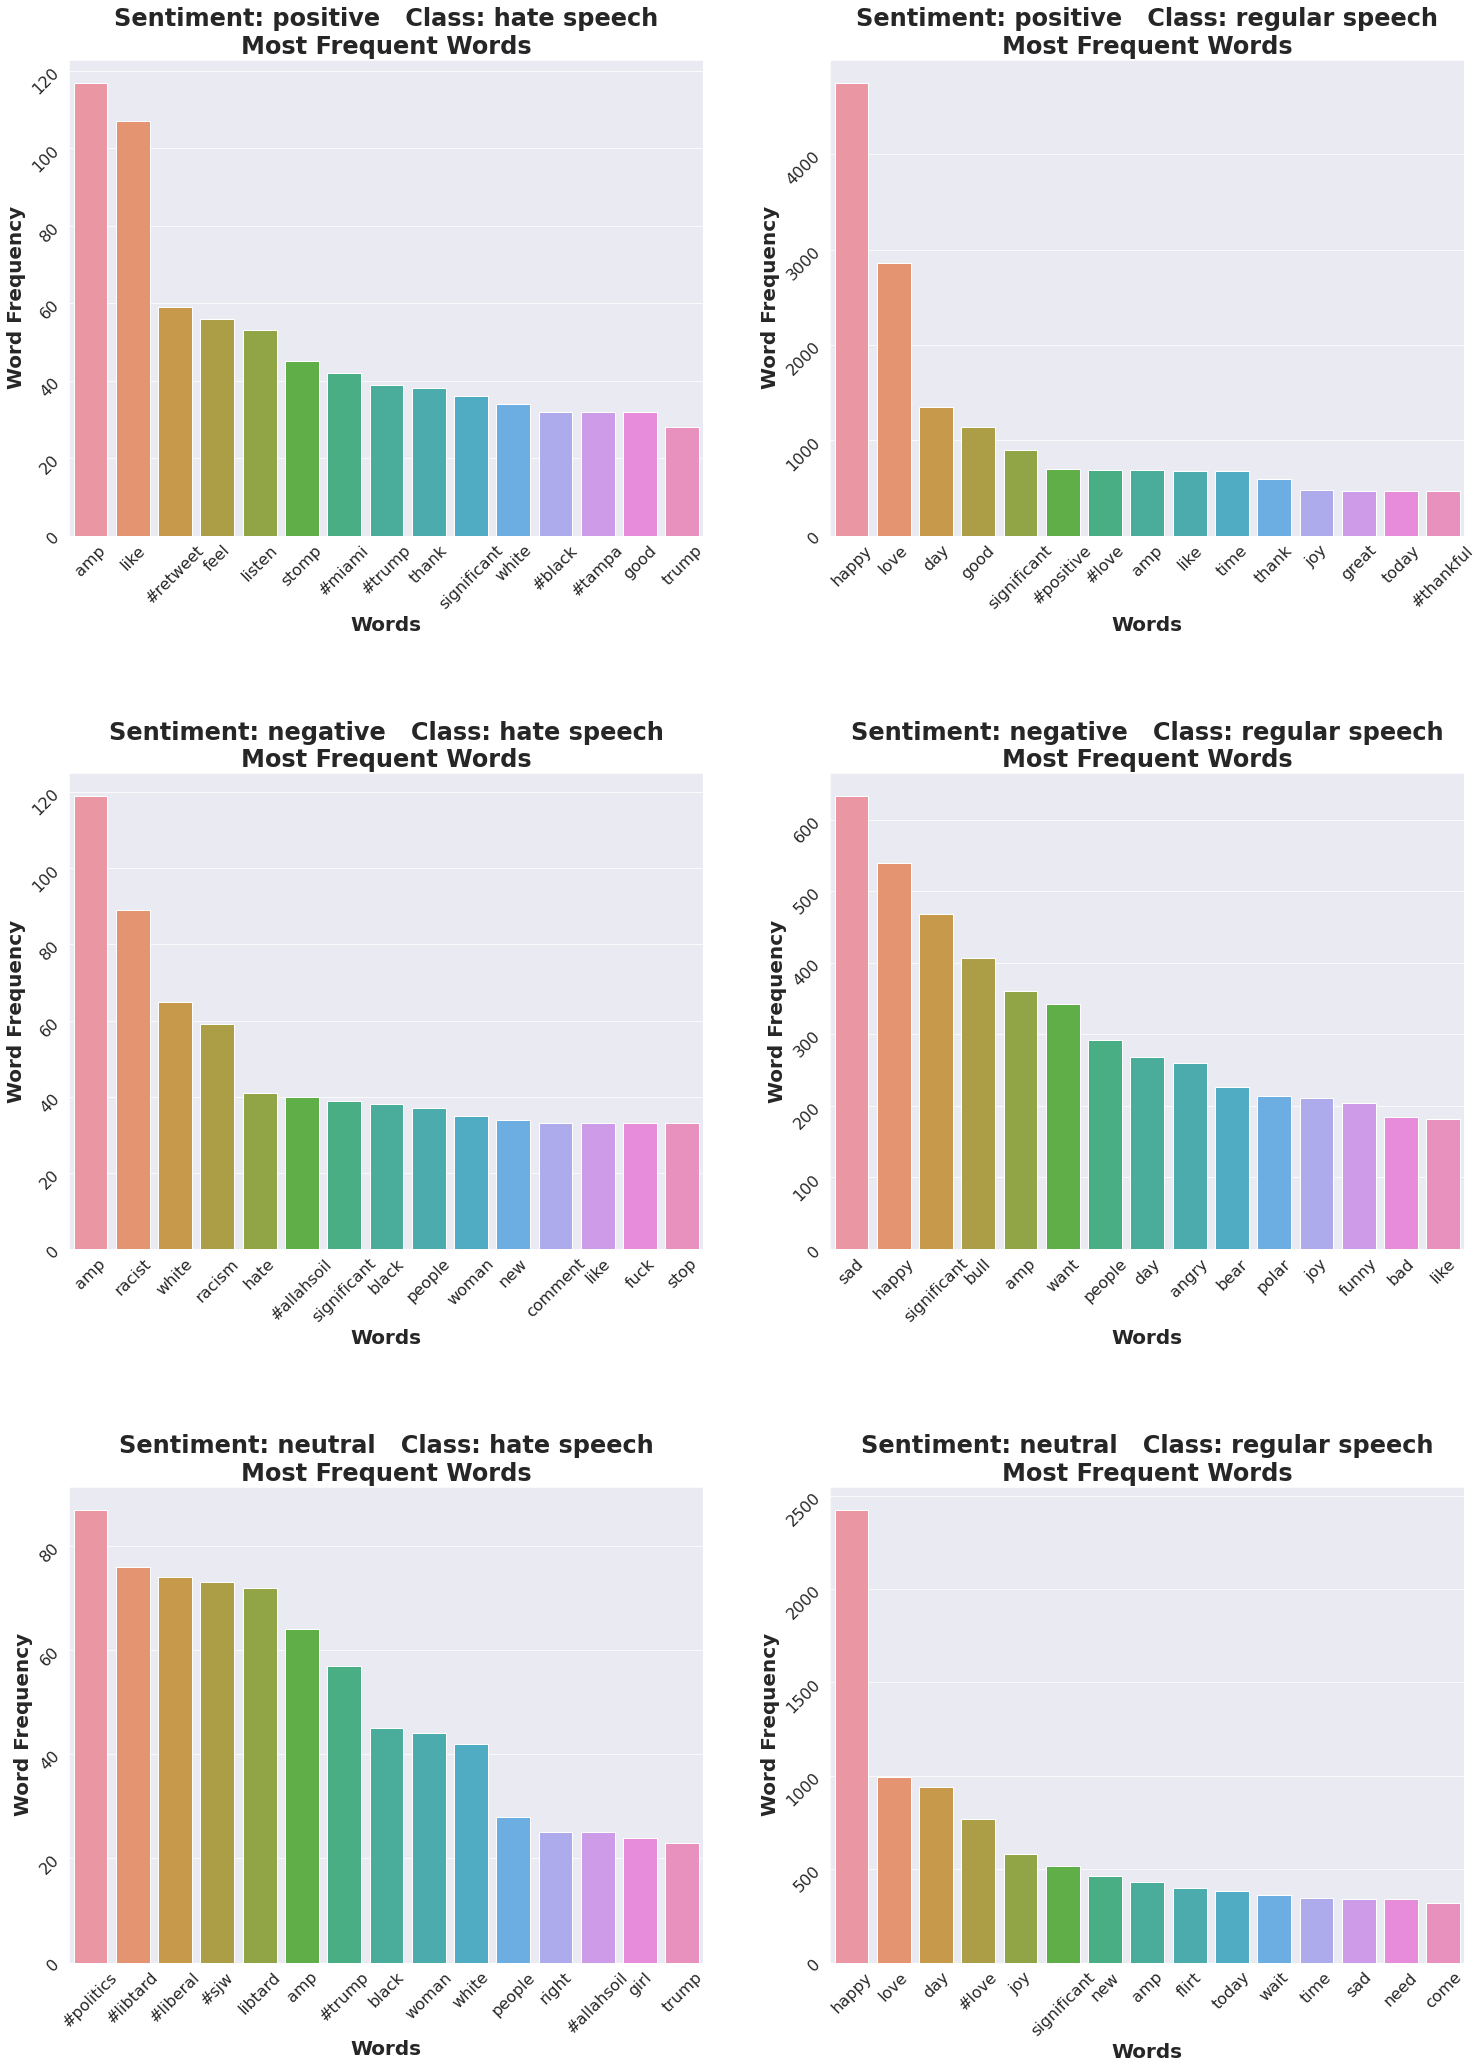

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (25, 35), squeeze=False, gridspec_kw = {'wspace':0.2, 'hspace':0.50})

frequency_dataFrames = [('positive', 'hate', most_frequent_hate_positive_df), ('positive', 'regular', most_frequent_regular_positive_df),
                        ('negative', 'hate', most_frequent_hate_negative_df), ('negative', 'regular', most_frequent_regular_negative_df),
                        ('neutral', 'hate', most_frequent_hate_neutral_df), ('neutral', 'regular', most_frequent_regular_neutral_df)]


for index, df_info in enumerate(frequency_dataFrames):

  sentiment, label, df = df_info

  row = index // 2
  col = index % 2

  sns.barplot(x='Word', y='Frequency', data=df, ax=axs[row][col])

  axs[row][col].set_title("Sentiment: " + sentiment + "   Class: " + label + " speech\nMost Frequent Words", fontsize=24, weight='bold')
  axs[row][col].set_xlabel("Words", fontsize=20, weight='bold')
  axs[row][col].set_ylabel("Word Frequency", fontsize=20, weight='bold')
  axs[row][col].tick_params(axis='both', labelsize=16, labelrotation=45)


In [ ]:
# Turn lists into giant strings for word cloud.
hate_positive_string = " ".join(hate_speech_positive_sent_list)
hate_negative_string = " ".join(hate_speech_negative_sent_list)
hate_neutral_string = " ".join(hate_speech_neutral_sent_list)

regular_positive_string = " ".join(regular_speech_positive_sent_list)
regular_negative_string = " ".join(regular_speech_negative_sent_list)
regular_neutral_string = " ".join(regular_speech_neutral_sent_list)

# Create word cloud objects for each of the six categories.
hate_positive_wordcloud = WordCloud().generate(hate_positive_string)
hate_negative_wordcloud = WordCloud().generate(hate_negative_string)
hate_neutral_wordcloud = WordCloud().generate(hate_neutral_string)

regular_positive_wordcloud = WordCloud().generate(regular_positive_string)
regular_negative_wordcloud = WordCloud().generate(regular_negative_string)
regular_neutral_wordcloud = WordCloud().generate(regular_neutral_string)


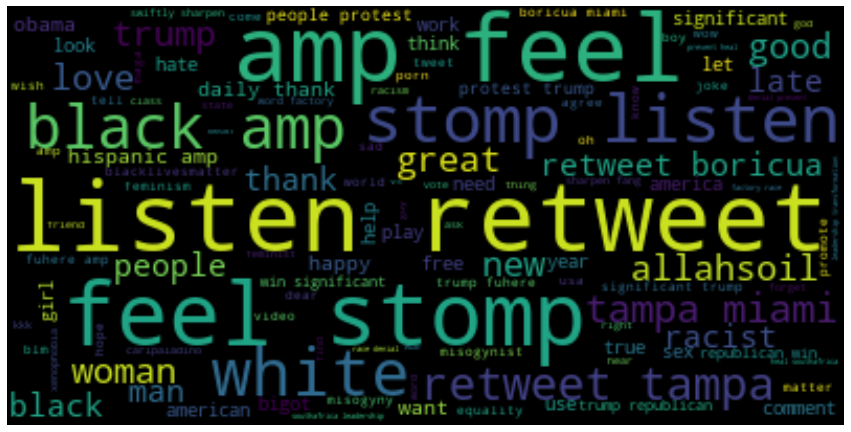

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a word cloud of words appearing tweets that are hate speech, but have a positive sentiment according to vader.
#
#------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(hate_positive_wordcloud, interpolation='bilinear');
plt.axis("off");

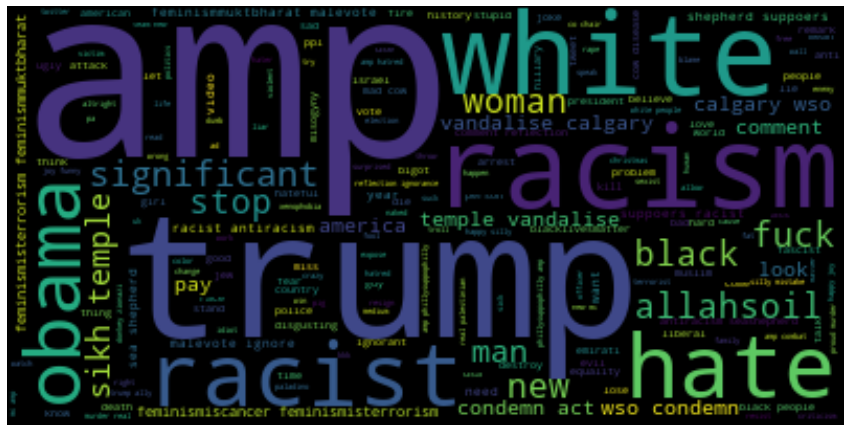

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a word cloud of words appearing tweets that are hate speech, and have a negative sentiment according to vader.
#
#------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(hate_negative_wordcloud, interpolation='bilinear');
plt.axis("off");

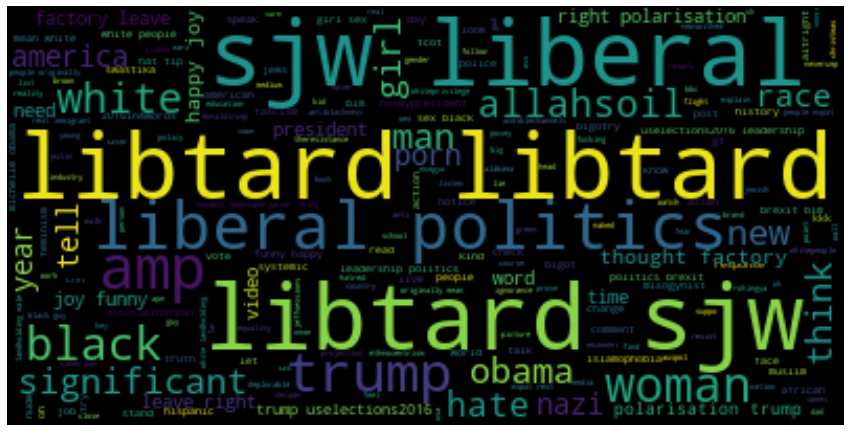

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a word cloud of words appearing tweets that are hate speech, and have a neutral sentiment according to vader.
#
#------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(hate_neutral_wordcloud, interpolation='bilinear');
plt.axis("off");

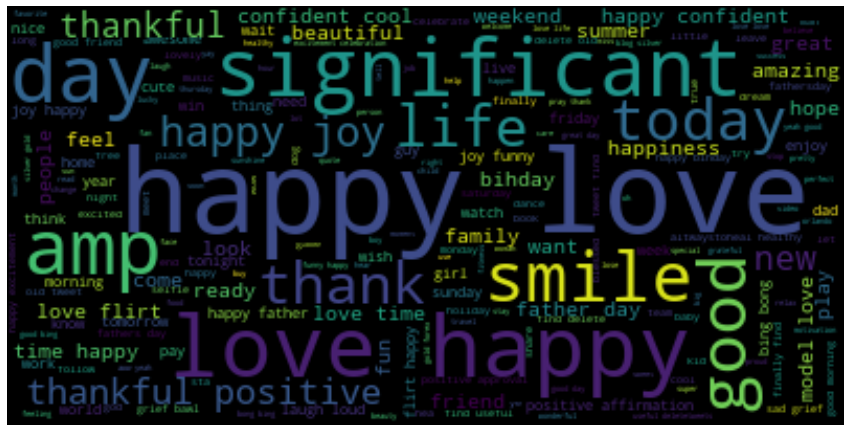

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a word cloud of words appearing tweets that are regular speech, and have a positive sentiment according to vader.
#
#------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(regular_positive_wordcloud, interpolation='bilinear');
plt.axis("off");

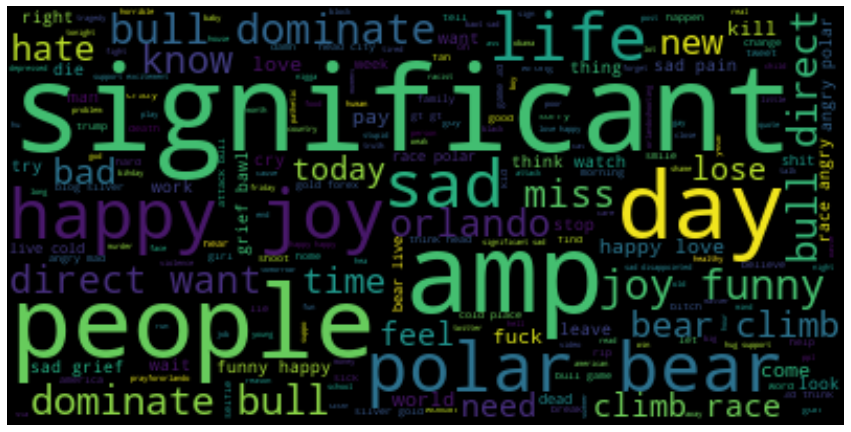

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a word cloud of words appearing tweets that are regular speech, and have a negative sentiment according to vader.
#
#------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(regular_negative_wordcloud, interpolation='bilinear');
plt.axis("off");

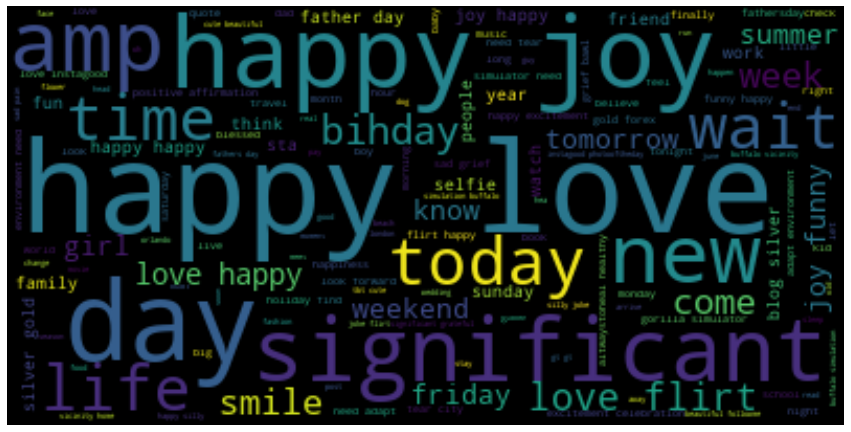

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------
# Create a word cloud of words appearing tweets that are regular speech, and have a neutral sentiment according to vader.
#
#------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(regular_neutral_wordcloud, interpolation='bilinear');
plt.axis("off");